# Playing the Game: How were Sports-realted stocks affected by the COVID-19 Pandemic?
## We Imported everything necesary for inital data ingestion and dataframe creation.

In [1]:

import pandas as pd
import hvplot.pandas
import os
import numpy as np
from pathlib import Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\extrausernicksav\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Setup our API key to pull stock data and set time frame from a year before pandemic to present. 

In [2]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [3]:

ticker = ["PENN", "MGM", "CHDN", "FOX"]


timeframe = "1D"


start_date = pd.Timestamp("2019-03-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

niall_portfolio = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

niall_portfolio.head()

CHDN                                    FOX  \
                            open    high    low  close    volume   open   
time                                                                      
2019-03-25 00:00:00-04:00  84.75  86.735  84.25  86.03  171289.0  37.57   
2019-03-26 00:00:00-04:00  87.05  88.200  85.73  86.85  185309.0  36.46   
2019-03-27 00:00:00-04:00  86.79  87.400  84.72  85.72  173464.0  36.75   
2019-03-28 00:00:00-04:00  86.13  88.750  86.13  88.39  242807.0  36.14   
2019-03-29 00:00:00-04:00  88.41  91.120  88.41  90.18  312007.0  35.88   

                                                           MGM          \
                            high    low  close   volume   open    high   
time                                                                     
2019-03-25 00:00:00-04:00  37.81  36.35  36.44  3211772  26.04  26.410   
2019-03-26 00:00:00-04:00  37.35  36.46  36.71  2815218  25.85  26.130   
2019-03-27 00:00:00-04:00  37.17  36.06  36.20  2631209  25.75  25.780   
2019-03-28 00:00:00-04:00  36.47  35.55  35.67  1790626  25.02  25.855   
2019-03-29 00:00:00-04:00  36.17  35.39  35.88  1981327  25.69  26.070   

                                                    PENN                       \
                              low  close   volume   open   high    low  close   
time                                                                            
2019-03-25 00:00:00-04:00  25.725  25.75  5540964  20.19  20.33  19.84  20.02   
2019-03-26 00:00:00-04:00  25.560  25.78  4547117  19.83  20.38  19.76  19.99   
2019-03-27 00:00:00-04:00  24.855  25.00  8314953  20.04  20.04  19.48  19.74   
2019-03-28 00:00:00-04:00  25.020  25.44  7553829  19.77  20.33  19.45  19.80   
2019-03-29 00:00:00-04:00  25.490  25.66  5639565  20.01  20.36  19.87  20.10   

                                      
                              volume  
time                                  
2019-03-25 00:00:00-04:00  1234067.0  
2019-03-26 00:00:00-04:00  1661558.0  
2019-03-27 00:00:00-04:00  1516170.0  
2019-03-28 00:00:00-04:00  1705574.0  
2019-03-29 00:00:00-04:00  2316419.0

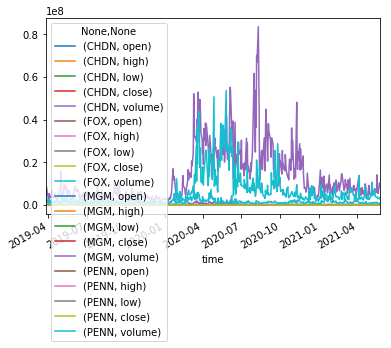

In [4]:
niall_portfolio.plot()

In [5]:
niall_portfolio_prices = pd.DataFrame()
niall_portfolio_prices['PENN'] = niall_portfolio['PENN']['close']
niall_portfolio_prices['MGM'] = niall_portfolio['MGM']['close']
niall_portfolio_prices['CHDN'] = niall_portfolio['CHDN']['close']
niall_portfolio_prices['FOX'] = niall_portfolio['FOX']['close']
niall_portfolio_prices.index = niall_portfolio_prices.index.date
niall_portfolio_prices.head(10)

PENN    MGM   CHDN    FOX
2019-03-25  20.02  25.75  86.03  36.44
2019-03-26  19.99  25.78  86.85  36.71
2019-03-27  19.74  25.00  85.72  36.20
2019-03-28  19.80  25.44  88.39  35.67
2019-03-29  20.10  25.66  90.18  35.88
2019-04-01  20.45  26.60  90.65  36.15
2019-04-02  20.80  26.79  89.80  35.70
2019-04-03  20.99  27.01  90.65  35.50
2019-04-04  20.88  27.15  90.35  36.02
2019-04-05  21.37  27.44  92.05  36.98

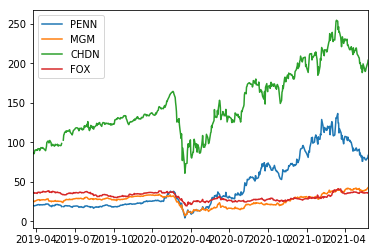

In [6]:
niall_portfolio_prices.plot()

In [7]:

niall_five_year = MCSimulation(
    portfolio_data = niall_portfolio,
    weights = [.25, .25, .25, .25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [8]:
niall_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1      1.054826  0.983037  0.991238  1.009334  1.020283  0.983286  1.001413   
2      1.040958  0.979181  0.975511  1.010500  0.988667  0.983611  1.008928   
3      1.041906  0.974543  0.985819  1.000578  0.971268  0.969261  1.010502   
4      1.041697  0.943244  1.010096  0.987494  0.998095  0.957380  1.024730   
5      1.007006  0.908812  1.023804  1.019801  1.034707  0.960086  1.036820   
6      0.984887  0.916290  1.021388  1.034663  1.058226  0.949239  0.987205   
7      0.985772  0.930039  1.026281  1.048514  1.079188  0.916320  1.006033   
8      0.970177  0.927378  1.012514  1.060661  1.091729  0.920382  1.000893   
9      1.001316  0.935316  1.041470  1.068996  1.101239  0.936653  1.017896   
10     1.020165  0.915966  1.095423  1.073376  1.108444  0.965045  0.997743   
11     1.026879  0.909017  1.095182  1.101219  1.119904  0.942357  0.971783   
12     1.047261  0.914883  1.067396  1.075569  1.125938  0.940290  0.980921   
13     1.054490  0.923272  1.077562  1.089240  1.107516  0.943371  0.996601   
14     1.006000  0.887448  1.075984  1.085344  1.116672  0.952323  1.018342   
15     0.946582  0.894615  1.055386  1.106290  1.101584  0.953857  1.027428   
16     0.955888  0.913201  1.025967  1.119987  1.074178  0.986603  1.005351   
17     0.938343  0.928700  1.008321  1.145533  1.091482  0.970597  0.998507   
18     0.932231  0.897286  0.951596  1.122582  1.080787  0.986871  1.035789   
19     0.949600  0.929243  0.925347  1.121036  1.094598  0.988075  1.019773   
20     0.959320  0.924635  0.940510  1.094294  1.097612  0.950381  1.044650   
21     0.966599  0.948797  0.935569  1.073032  1.111480  0.974209  1.046910   
22     0.973070  0.979888  0.892814  1.081346  1.132347  0.965517  1.050222   
23     0.973421  0.993232  0.877453  1.121001  1.119906  0.960945  1.000275   
24     0.955731  1.034234  0.887633  1.105225  1.148091  0.939222  0.982700   
25     0.949180  1.038983  0.898293  1.127964  1.132344  0.969398  0.997950   
26     0.951947  1.022245  0.866363  1.149952  1.108729  0.986427  1.010080   
27     0.938637  1.021884  0.861191  1.190564  1.106784  0.983839  0.991082   
28     0.950090  1.006221  0.844664  1.191197  1.118021  0.986422  0.985659   
29     0.923950  1.037565  0.848057  1.170569  1.161961  1.022436  1.030736   
...         ...       ...       ...       ...       ...       ...       ...   
1231  48.531015  6.696582  4.874505  3.974370  7.843333  4.133818  5.784546   
1232  51.435417  6.548754  4.987424  3.911010  7.732680  4.098620  5.870598   
1233  52.437097  6.780734  5.097795  3.992119  7.820588  4.153021  5.628391   
1234  53.602386  6.685642  5.090534  4.002051  7.970354  4.171092  5.811409   
1235  54.429868  6.698910  5.057736  3.927690  8.024551  4.110166  5.720264   
1236  55.987275  6.779156  4.963281  3.887416  7.953576  4.023075  5.780205   
1237  57.227477  6.700916  4.848666  3.904311  8.026606  4.102698  5.713847   
1238  58.299359  6.889206  4.867741  3.926565  8.268667  4.208904  5.612717   
1239  60.096747  6.738595  4.800094  3.920896  8.265869  4.162004  5.693862   
1240  59.444807  6.647238  4.949173  3.953170  7.979436  4.306730  5.523590   
1241  59.317412  6.465584  4.875411  3.859834  8.272876  4.196750  5.622347   
1242  60.623528  6.487461  4.869400  3.877371  8.036938  4.216495  5.671624   
1243  59.090520  6.635370  4.848767  3.921396  8.115928  4.189826  5.830109   
1244  58.663639  6.736472  4.951323  3.910791  8.077370  4.170937  5.894133   
1245  58.103371  6.736126  4.809408  3.876493  8.058177  4.007606  5.913229   
1246  57.731787  6.570776  4.948999  3.837831  7.934680  3.977764  5.782745   
1247  59.852776  6.512055  4.878227  3.900362  7.860833  4.017779  5.909855   
1248  60.392231  6.705321  4.907329  3.850221  8.139510  3.998862  5.692182   
1249  59.082012  6.508115  5.019300  3.976607  8.124685  3.989

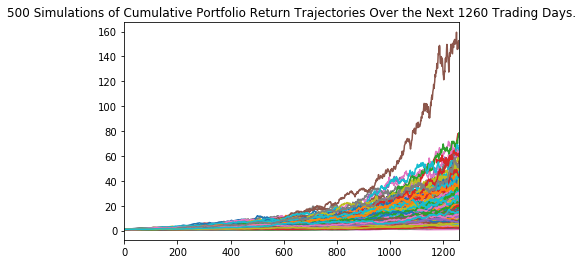

In [9]:
niall_simulation = niall_five_year.plot_simulation()

In [10]:
tbl = niall_five_year.summarize_cumulative_return()

In [11]:
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $29996.36 and $511302.98.


### Once we chose the full portfolio of sports-related stocks we pulled the data for all 13 stocks

In [12]:

ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD"]


timeframe = "1D"


start_date = pd.Timestamp("2021-01-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-30", tz="America/New_York").isoformat()


all_stocks = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

all_stocks.head()

ATVI                                   BYD         \
                            open   high    low  close    volume   open   high   
time                                                                            
2021-01-22 00:00:00-05:00  94.68  95.23  93.82  94.43   3212422  49.15  50.28   
2021-01-25 00:00:00-05:00  95.53  95.76  92.74  93.39   4865938  49.84  50.77   
2021-01-26 00:00:00-05:00  93.35  93.68  92.14  92.38   5917447  49.49  49.60   
2021-01-27 00:00:00-05:00  91.00  91.00  88.21  88.66  11195033  46.20  46.79   
2021-01-28 00:00:00-05:00  89.57  91.42  89.01  90.28   6117259  46.51  47.54   

                                                  ...    TTWO           \
                             low  close   volume  ...    open     high   
time                                              ...                    
2021-01-22 00:00:00-05:00  48.66  50.08   634127  ...  204.92  206.700   
2021-01-25 00:00:00-05:00  48.08  48.95   986836  ...  207.77  208.710   
2021-01-26 00:00:00-05:00  47.08  47.40   823673  ...  203.77  204.080   
2021-01-27 00:00:00-05:00  44.42  45.73  1524824  ...  200.28  201.065   
2021-01-28 00:00:00-05:00  45.03  46.00  1271666  ...  195.48  203.000   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2021-01-22 00:00:00-05:00  202.79  204.62   645020  52.60  55.60  52.2300   
2021-01-25 00:00:00-05:00  201.67  203.91   698737  56.25  56.99  53.2600   
2021-01-26 00:00:00-05:00  199.29  199.73   754480  55.69  57.66  54.5100   
2021-01-27 00:00:00-05:00  193.75  195.41  1161661  57.07  60.00  56.8801   
2021-01-28 00:00:00-05:00  195.48  200.31   924351  57.25  58.12  55.8800   

                                           
                           close   volume  
time                                       
2021-01-22 00:00:00-05:00  55.53   991206  
2021-01-25 00:00:00-05:00  53.94  2564183  
2021-01-26 00:00:00-05:00  57.47  1585532  
2021-01-27 00:00:00-05:00  57.44  3453994  
2021-01-28 00:00:00-05:00  56.58   832160  

[5 rows x 65 columns]

### We set the portfolio to all even weights for a simulation to see how the portfolio would perform 5 years after the release of the COVID-19 Vaccine.

In [13]:
all_stocks_five_year = MCSimulation(
    portfolio_data = all_stocks,
    weights = [.077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [14]:
all_stocks_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000328  1.021032  0.999000  0.999006  0.993443  1.009988  0.978144   
2     1.003472  1.020073  0.992675  1.003806  0.994247  1.022350  0.985976   
3     1.011773  1.006029  0.985180  1.012240  0.992733  1.032332  0.995570   
4     1.011558  1.018952  0.976852  1.006559  0.985149  1.030774  0.990478   
5     1.013827  1.024837  0.963848  0.998817  1.001660  1.026252  0.994067   
6     1.004324  1.026399  0.964911  0.994762  1.002793  1.026305  1.018704   
7     1.005587  1.028661  0.944118  1.021044  1.000818  1.014374  1.007566   
8     1.006211  1.020285  0.950366  1.018843  1.007524  1.001422  1.029711   
9     0.998122  1.008444  0.956677  1.016263  1.004686  1.008748  1.025325   
10    0.992920  0.999799  0.952325  1.027022  1.009804  1.018975  1.033723   
11    0.991492  1.013046  0.945728  1.026267  1.005368  1.022493  1.031250   
12    0.998847  1.003950  0.947978  1.022581  1.002337  1.018293  1.022108   
13    0.998838  1.007781  0.956814  1.040904  1.001584  1.015524  1.018373   
14    0.984627  1.034369  0.949322  1.049641  1.007861  1.035038  1.023740   
15    0.985072  1.036539  0.943676  1.048401  1.019936  1.029588  1.025533   
16    0.989221  1.041265  0.939798  1.074095  1.019397  1.050319  1.023155   
17    1.004747  1.032480  0.938580  1.069836  1.007742  1.041861  1.036568   
18    1.003349  1.028671  0.958509  1.076090  0.998476  1.032785  1.031192   
19    0.997788  1.039154  0.960315  1.077432  1.008256  1.028856  1.026483   
20    0.995985  1.032062  0.966593  1.067247  1.013823  1.031843  1.021368   
21    0.980929  1.026785  0.985321  1.065189  1.018707  1.039430  1.033686   
22    0.988543  1.054608  0.988792  1.063769  1.021653  1.044761  1.034876   
23    0.981964  1.076546  0.987010  1.060530  1.022361  1.064136  1.024583   
24    0.973344  1.054641  0.982573  1.074674  1.022831  1.073068  1.030432   
25    0.974361  1.051124  0.987329  1.102947  1.018390  1.081676  1.024053   
26    0.962331  1.073339  0.986367  1.098842  1.032325  1.085336  1.038091   
27    0.960443  1.073676  0.993514  1.096875  1.040336  1.064444  1.026904   
28    0.947208  1.079071  1.001823  1.088780  1.037875  1.073160  1.037686   
29    0.966193  1.070059  1.011760  1.096238  1.035122  1.059250  1.045548   
...        ...       ...       ...       ...       ...       ...       ...   
1231  1.544982  1.505950  1.648887  2.047673  1.477263  1.327153  2.123005   
1232  1.535531  1.498853  1.651774  2.084698  1.471116  1.340859  2.124378   
1233  1.541326  1.512362  1.679126  2.056487  1.463681  1.342640  2.130388   
1234  1.526459  1.521748  1.692412  2.080851  1.472003  1.348652  2.123530   
1235  1.547499  1.536055  1.729044  2.084739  1.466188  1.351300  2.131418   
1236  1.556782  1.512177  1.745487  2.104338  1.437457  1.373691  2.125235   
1237  1.567440  1.519708  1.746400  2.113244  1.431410  1.379794  2.136056   
1238  1.566793  1.527382  1.749895  2.096186  1.416825  1.375659  2.139789   
1239  1.581749  1.527780  1.750080  2.060313  1.418204  1.373535  2.160243   
1240  1.591617  1.546641  1.760199  2.054156  1.418491  1.399552  2.175954   
1241  1.588255  1.531916  1.763756  2.061224  1.403961  1.379132  2.151813   
1242  1.594297  1.536586  1.782640  2.055261  1.410167  1.368795  2.151669   
1243  1.584249  1.525355  1.796764  2.067762  1.423900  1.358662  2.153809   
1244  1.586873  1.514790  1.825092  2.052057  1.408819  1.363535  2.121287   
1245  1.591164  1.534613  1.817397  2.059218  1.433349  1.362560  2.104249   
1246  1.573059  1.539528  1.822729  2.057337  1.430207  1.353688  2.087619   
1247  1.571688  1.528632  1.836550  2.032802  1.449563  1.351516  2.050573   
1248  1.583728  1.531265  1.819087  2.036967  1.450197  1.365734  2.053831   
1249  1.558282  1.529645  1.819138  2.009783  1.437255  1.349334  2.053067   
1250  1.560941  1.549658  1.81723

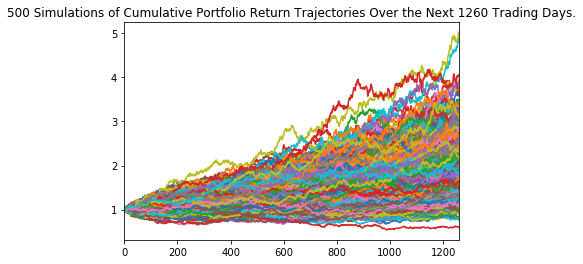

In [15]:
all_stocks_five_year.plot_simulation()

In [16]:
tbl_two = all_stocks_five_year.summarize_cumulative_return()

### We used the Monte Carlo simulations to give a potential range of how an inital investment of $1 Million would perform.

In [17]:
ci_lower = round(tbl_two[8]*1000000,2)
ci_upper = round(tbl_two[9]*1000000,2)


print(f"There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio post-pandemic"
      f" over the next 5 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio post-pandemic over the next 5 year will end within in the range of $976099.68 and $3375694.87.


In [18]:
all_stocks_prices = pd.DataFrame()
all_stocks_prices['PENN'] = all_stocks['PENN']['close']
all_stocks_prices['MGM'] = all_stocks['MGM']['close']
all_stocks_prices['CHDN'] = all_stocks['CHDN']['close']
all_stocks_prices['FOX'] = all_stocks['FOX']['close']
all_stocks_prices['EA'] = all_stocks['EA']['close']
all_stocks_prices['ATVI'] = all_stocks['ATVI']['close']
all_stocks_prices['TTWO'] = all_stocks['TTWO']['close']
all_stocks_prices['NVDA'] = all_stocks['NVDA']['close']
all_stocks_prices['BYD'] = all_stocks['BYD']['close']
all_stocks_prices['DKNG'] = all_stocks['DKNG']['close']
all_stocks_prices['FUBO'] = all_stocks['FUBO']['close']
all_stocks_prices['WWE'] = all_stocks['WWE']['close']
all_stocks_prices['NKE'] = all_stocks['NKE']['close']

all_stocks_prices.index = all_stocks.index.date
all_stocks_prices.head(10)

PENN    MGM    CHDN     FOX      EA   ATVI    TTWO    NVDA  \
2021-01-22  109.40  31.37  214.35  29.170  146.01  94.43  204.62  548.50   
2021-01-25  104.04  29.97  204.85  30.690  146.37  93.39  203.91  546.39   
2021-01-26   99.51  29.59  197.61  33.410  146.28  92.38  199.73  537.41   
2021-01-27   97.71  28.37  184.83  32.475  146.24  88.66  195.41  517.05   
2021-01-28  107.01  29.55  195.45  30.610  142.94  90.28  200.31  521.93   
2021-01-29  103.78  28.55  187.06  29.881  143.15  91.01  200.36  519.03   
2021-02-01  103.98  29.28  196.07  30.640  145.81  91.42  200.95  529.48   
2021-02-02  110.56  30.65  205.97  29.560  149.03  93.98  207.23  542.28   
2021-02-03  109.25  30.89  203.57  29.150  140.65  92.77  202.66  541.12   
2021-02-04  118.35  32.48  211.17  29.330  138.70  92.68  201.49  546.57   

              BYD     DKNG    FUBO    WWE       NKE  
2021-01-22  50.08  52.5000  37.760  55.53  139.3200  
2021-01-25  48.95  51.3300  40.970  53.94  137.5500  
2021-01-26  47.40  54.0600  43.920  57.47  135.1000  
2021-01-27  45.73  54.3200  46.670  57.44  131.0200  
2021-01-28  46.00  56.1700  39.905  56.58  134.6700  
2021-01-29  45.14  54.1389  42.240  56.34  133.6200  
2021-02-01  46.07  54.6400  52.390  57.58  135.7100  
2021-02-02  47.88  59.3000  48.455  57.16  139.4700  
2021-02-03  48.02  60.1200  49.060  56.50  138.6300  
2021-02-04  50.42  63.1700  50.990  56.02  140.6298

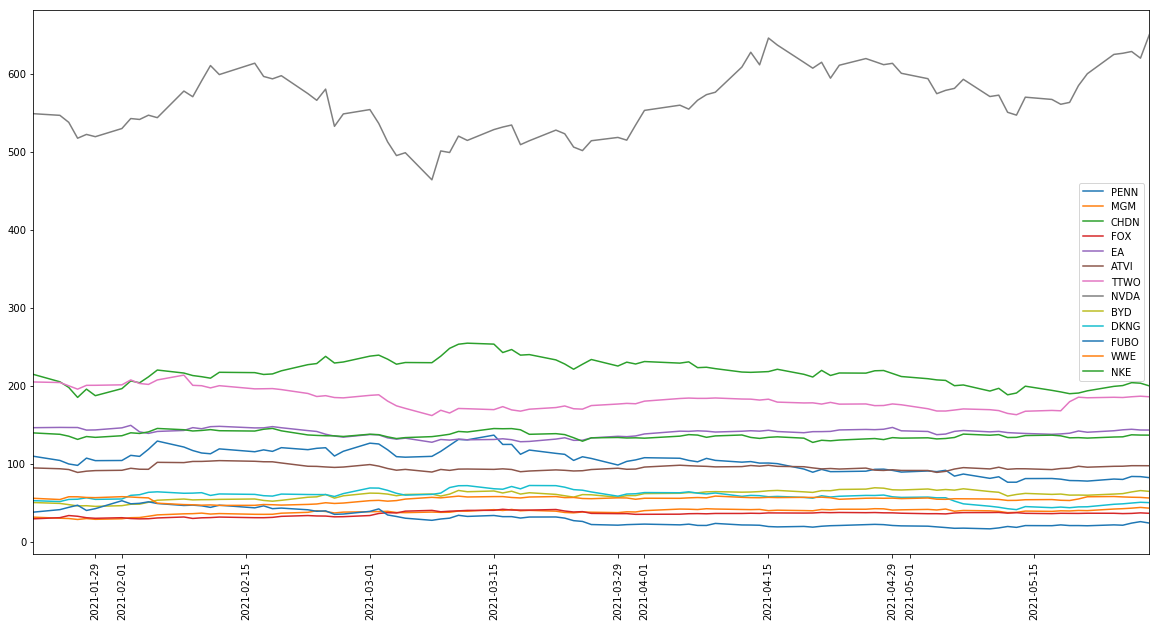

In [19]:
all_stocks_prices.plot.line(figsize=(20,10), rot=90)

### We then used a different date range of a year before the pandemic to present to show how the portfolio fared the pandemic markets. 

In [20]:

ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD"]


timeframe = "1D"


start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()


all_stocks_two_year = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

all_stocks_two_year.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 65 columns]

In [21]:
#dropped columns

all_stocks_prices_two = pd.DataFrame()
all_stocks_prices_two['PENN'] = all_stocks_two_year['PENN']['close']
all_stocks_prices_two['MGM'] = all_stocks_two_year['MGM']['close']
all_stocks_prices_two['CHDN'] = all_stocks_two_year['CHDN']['close']
all_stocks_prices_two['FOX'] = all_stocks_two_year['FOX']['close']
all_stocks_prices_two['EA'] = all_stocks_two_year['EA']['close']
all_stocks_prices_two['ATVI'] = all_stocks_two_year['ATVI']['close']
all_stocks_prices_two['TTWO'] = all_stocks_two_year['TTWO']['close']
all_stocks_prices_two['NVDA'] = all_stocks_two_year['NVDA']['close']
all_stocks_prices_two['BYD'] = all_stocks_two_year['BYD']['close']
all_stocks_prices_two['DKNG'] = all_stocks_two_year['DKNG']['close']
all_stocks_prices_two['FUBO'] = all_stocks_two_year['FUBO']['close']
all_stocks_prices_two['WWE'] = all_stocks_two_year['WWE']['close']
all_stocks_prices_two['NKE'] = all_stocks_two_year['NKE']['close']

all_stocks_prices_two.index = all_stocks_two_year.index.date
all_stocks_prices_two.head(10)

PENN    MGM    CHDN    FOX     EA    ATVI    TTWO    NVDA  \
2019-05-28  20.590  25.33   95.97  36.17  93.50  43.500  106.51  143.30   
2019-05-29  20.320  25.35   95.81  35.29  92.55  43.990  106.99  140.31   
2019-05-30  19.740  25.34   96.36  34.82  92.14  43.560  106.98  139.11   
2019-05-31  18.835  24.83   98.58  34.71  93.07  43.360  108.15  135.46   
2019-06-03     NaN  23.86     NaN  33.78  91.30  42.370  105.95  133.78   
2019-06-04  18.790  25.65  102.78  34.08  94.13  43.620  109.00  143.02   
2019-06-05  18.670  25.96  109.13  34.02  95.26  44.530  111.55  141.33   
2019-06-06  18.870  26.50  110.28  33.74  96.39  44.110  110.71  143.79   
2019-06-07  19.720  26.27  112.27  33.68  96.98  45.385  111.61  145.50   
2019-06-10  20.070  27.42  114.18  33.75  95.52  46.000  111.78  148.45   

               BYD  DKNG  FUBO    WWE    NKE  
2019-05-28  25.490   NaN   NaN  74.07  81.18  
2019-05-29  25.080   NaN   NaN  72.50  78.85  
2019-05-30  24.250   NaN   NaN  72.51  79.24  
2019-05-31  23.925   NaN   NaN  72.73  77.14  
2019-06-03  22.960   NaN   NaN  72.74  78.01  
2019-06-04  24.040   NaN   NaN  73.12  81.62  
2019-06-05  23.830   NaN   NaN  73.69  82.74  
2019-06-06  24.180   NaN   NaN  73.50  82.47  
2019-06-07  25.070   NaN   NaN  73.28  83.41  
2019-06-10  25.650   NaN   NaN  71.51  82.57

### We dropped columns in the dataframe to isloate prices only to show a better graph. 

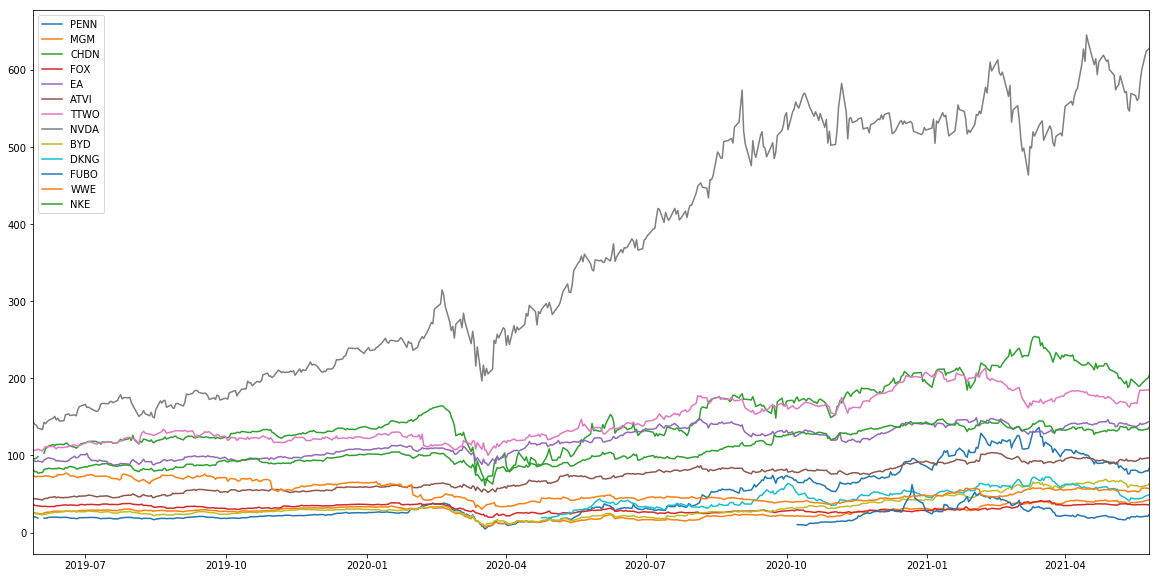

In [22]:
all_stocks_prices_two.plot(figsize=(20,10))

In [23]:
through_covid_prediction = MCSimulation(
    portfolio_data = all_stocks_two_year,
    weights = [.077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [24]:
through_covid_prediction.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.027080   1.011715   0.979990   1.004866   0.960416   1.011464   
2      1.019011   1.014300   0.968804   1.003238   0.958806   1.020547   
3      1.028412   1.021112   0.963432   0.990660   0.936186   1.039500   
4      1.031896   1.029522   0.958976   0.978319   0.941483   1.047557   
5      1.027960   1.031680   0.982961   0.978159   0.948515   1.057541   
6      1.033977   1.037730   0.988957   0.961160   0.937754   1.064643   
7      1.014784   1.044728   0.980149   0.974506   0.933700   1.074339   
8      1.010152   1.027878   0.960409   0.983911   0.932133   1.075577   
9      1.011621   1.045214   0.960428   0.989995   0.950699   1.083600   
10     1.014381   1.044169   0.962730   0.979188   0.985956   1.055771   
11     1.032078   1.039939   0.952600   1.005240   0.976756   1.073739   
12     1.030313   1.048804   0.957169   0.995600   0.986795   1.068980   
13     1.025894   1.029213   0.944847   0.995901   0.992146   1.101752   
14     1.018983   1.056179   0.944590   1.011076   0.977323   1.104555   
15     1.018858   1.066696   0.947126   0.996702   0.972326   1.129364   
16     1.020209   1.059780   0.954150   0.995124   0.969856   1.122358   
17     1.037456   1.063348   0.972864   0.991485   0.973660   1.113222   
18     1.045676   1.054680   0.969142   0.996391   0.966871   1.119057   
19     1.047468   1.029788   0.964380   0.988483   0.997574   1.103401   
20     1.053199   1.045633   0.976805   1.006611   1.025257   1.088621   
21     1.055839   1.051514   0.984404   1.011560   1.022293   1.086607   
22     1.060121   1.059391   0.998102   1.020200   1.046334   1.099998   
23     1.059154   1.071045   0.997180   1.008938   1.030111   1.101250   
24     1.073761   1.079864   1.005298   1.014707   1.024890   1.108896   
25     1.076426   1.084846   1.015436   1.030236   1.012341   1.110246   
26     1.084138   1.085999   1.015209   1.022808   1.019967   1.099880   
27     1.094646   1.109953   1.034356   1.031590   1.025588   1.104014   
28     1.091393   1.119194   1.023875   1.032014   1.043143   1.078583   
29     1.072730   1.129134   1.027364   1.020947   1.068183   1.071373   
...         ...        ...        ...        ...        ...        ...   
1231  18.066592  27.832076  17.183327  28.539895  30.285008  20.658944   
1232  17.944767  28.063356  17.242152  28.379621  30.591171  20.442637   
1233  17.843768  28.277573  17.296679  28.531097  30.420829  20.255850   
1234  17.854214  28.260434  17.304799  28.661617  30.580716  20.735778   
1235  17.800615  28.545920  17.480587  29.342963  30.405109  20.896025   
1236  18.256603  28.880499  17.593301  29.393149  30.575521  20.856903   
1237  18.399039  29.025662  17.266641  29.854612  29.820443  20.690637   
1238  18.575684  29.217753  17.428041  30.356953  29.831455  20.374377   
1239  18.547940  29.251858  17.651002  30.395783  29.988992  20.463916   
1240  18.393497  29.147874  17.531504  30.042636  29.639182  20.273677   
1241  18.754138  28.890778  17.399431  30.093855  29.467587  20.398171   
1242  18.501370  29.045587  17.016841  29.895349  30.107383  20.393020   
1243  18.590380  29.237897  17.063702  29.909968  29.703849  20.622130   
1244  18.552531  28.878184  17.236197  30.461181  29.345863  20.357563   
1245  18.706091  29.117668  17.382161  31.050571  29.510386  20.119728   
1246  18.234800  28.878736  17.664403  31.119641  29.887855  19.505030   
1247  18.404742  29.198769  17.388857  30.691449  29.469232  19.363817   
1248  18.741624  29.633154  17.625113  30.872050  30.596386  19.341509   
1249  18.697677  29.470907  17.544062  30.478468  30.812557  19.152201   
1250  18.852499  30.291164  17.606800  31.014917  30.863409  19.443253   
1251  18.840994  30.127773  17.783668  31.438269  31.361160  19.056885   
1252  19.292285  30.637509  17.920202  31.630616  31.398375  19.185563   
1253  19.248371 

In [25]:
tbl_three = through_covid_prediction.summarize_cumulative_return()

### We used the Monte Carlo simulation data to give us a rnage of how the portfolio would perform, evenly weighted with a $1 Million dollar inital investment. 

In [26]:
ci_lower = round(tbl_three[8]*1000000,2)
ci_upper = round(tbl_three[9]*1000000,2)


print(f"There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio through the pandemic"
      f" over the next 5 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio through the pandemic over the next 5 year will end within in the range of $11360236.5 and $60887441.13.


### We then used the same portfolio and just pulled data only from before the pandemic to predict how the stocks would fare if COVID had never happened. 

In [27]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD"]


timeframe = "1D"


start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-26", tz="America/New_York").isoformat()


no_covid = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

no_covid.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 55 columns]

In [28]:
no_covid_prediction = MCSimulation(
    portfolio_data = no_covid,
    weights = [.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .091],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
no_covid_prediction.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.012424  0.994995  0.984838  0.987916  0.990527  0.990363  1.003881   
2     1.011767  0.993720  0.993377  0.992451  0.993833  0.997042  1.001199   
3     1.032986  0.991605  0.982260  1.015560  0.990141  0.979676  1.006387   
4     1.030742  0.984459  0.983122  0.991682  0.991873  0.979612  1.003943   
5     1.015319  1.001446  0.981809  1.005233  0.983558  0.990677  1.006381   
6     1.004639  1.022374  1.008326  0.990875  0.985840  0.991209  1.013059   
7     1.006403  1.018101  0.995721  0.994305  0.996425  0.994297  1.010982   
8     1.027499  1.025621  1.005728  1.001500  0.997063  0.980959  1.024290   
9     1.020758  1.029114  1.003742  1.013288  0.982535  0.995166  1.028972   
10    1.007675  1.026915  1.021629  1.013455  0.964687  1.017484  1.061770   
11    1.021512  1.028625  1.015348  1.005001  0.977868  1.007358  1.056573   
12    1.006173  1.049644  1.022235  1.024804  0.981994  1.005332  1.061110   
13    1.002237  1.055021  1.014721  1.022921  0.964948  1.012089  1.046422   
14    0.991927  1.056408  1.007179  0.998374  0.954446  1.015702  1.048858   
15    0.987919  1.065649  1.019342  0.998386  0.964677  1.018476  1.065786   
16    0.970466  1.080838  1.015377  0.982052  0.961869  1.042843  1.042936   
17    0.962860  1.098134  1.036657  0.989992  0.959661  1.051707  1.031390   
18    0.955583  1.095313  1.031542  0.988536  0.947670  1.056187  1.053165   
19    0.958716  1.063693  1.026636  0.988668  0.931822  1.077204  1.049391   
20    0.959392  1.059897  1.019689  0.993826  0.953221  1.068708  1.075624   
21    0.954000  1.054430  1.011482  1.008587  0.949216  1.084459  1.086640   
22    0.949791  1.076238  1.020669  0.987020  0.945001  1.107472  1.081258   
23    0.943584  1.088184  1.007383  0.976381  0.926538  1.090901  1.087605   
24    0.942806  1.086200  1.008740  0.977610  0.913122  1.115801  1.096788   
25    0.942926  1.098855  1.004452  0.959615  0.901276  1.099692  1.106143   
26    0.937171  1.098122  0.998900  0.962362  0.870572  1.127084  1.099661   
27    0.950947  1.088057  0.997663  0.960212  0.858391  1.157025  1.105333   
28    0.949524  1.087736  0.999566  0.942003  0.873718  1.171058  1.106345   
29    0.950337  1.085778  0.992177  0.958506  0.862974  1.164229  1.075692   
...        ...       ...       ...       ...       ...       ...       ...   
1231  7.053566  7.059914  2.320599  3.642828  1.694098  5.977166  2.342043   
1232  6.893532  6.971266  2.371907  3.667031  1.697869  5.985907  2.316741   
1233  6.922601  6.901962  2.369370  3.637126  1.698758  6.010963  2.307960   
1234  6.832506  7.024124  2.364156  3.658710  1.720601  6.134114  2.314105   
1235  6.840125  7.033511  2.333623  3.686358  1.730541  5.957761  2.345859   
1236  6.859623  7.071716  2.290284  3.664278  1.734076  5.920517  2.355044   
1237  6.871887  7.124722  2.237053  3.613841  1.732744  5.924793  2.355528   
1238  6.938667  7.042085  2.255087  3.595900  1.759916  5.849296  2.318377   
1239  6.953490  7.234664  2.296579  3.645758  1.804888  5.878239  2.327539   
1240  6.892813  7.314718  2.310215  3.642216  1.819213  5.909633  2.324948   
1241  6.934227  7.424893  2.301472  3.647489  1.800869  5.972892  2.295593   
1242  6.806297  7.462000  2.332199  3.624667  1.819053  5.937413  2.310740   
1243  6.875178  7.569076  2.330506  3.605942  1.817688  5.944159  2.296205   
1244  6.970311  7.619653  2.405584  3.572349  1.822312  5.831397  2.339488   
1245  7.035055  7.765389  2.394502  3.536450  1.861120  5.791229  2.404645   
1246  6.989463  7.947767  2.347164  3.518118  1.840802  5.878884  2.359733   
1247  7.067769  7.919899  2.376533  3.619311  1.804580  5.739663  2.401083   
1248  7.165870  7.895174  2.382853  3.686239  1.782503  5.702876  2.419011   
1249  7.096840  7.870024  2.381676  3.688689  1.803780  5.778913  2.447343   
1250  7.084630  7.931590  2.35535

In [30]:
no_covid_prediction.summarize_cumulative_return()

count           500.000000
mean              5.479489
std               2.639460
min               1.425079
25%               3.656062
50%               4.824127
75%               6.600367
max              22.759276
95% CI Lower      2.222851
95% CI Upper     12.063832
Name: 1260, dtype: float64

In [31]:
tbl_four = no_covid_prediction.summarize_cumulative_return()

### Using the Monte Carlo date we were able to create a possible range of performance from the evenly weighted portfolio with an inital investment of $1 Million dollars. 

In [32]:
ci_lower = round(tbl_four[8]*1000000,2)
ci_upper = round(tbl_four[9]*1000000,2)


print(f"There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio if Covid-19 never happened"
      f" over the next 5 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio if Covid-19 never happened over the next 5 year will end within in the range of $2222850.62 and $12063832.2.


In [33]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD", "SPY"]


timeframe = "1D"


start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()


sp500_all_stocks = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

sp500_all_stocks.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 70 columns]

### Then we included the SPY (which tracks the S&P 500) so we can see the relationship between our stocks prices and the general market. 

In [34]:
sp500_all_stocks_prices = pd.DataFrame()
sp500_all_stocks_prices['PENN'] = sp500_all_stocks['PENN']['close']
sp500_all_stocks_prices['MGM'] = sp500_all_stocks['MGM']['close']
sp500_all_stocks_prices['CHDN'] = sp500_all_stocks['CHDN']['close']
sp500_all_stocks_prices['FOX'] = sp500_all_stocks['FOX']['close']
sp500_all_stocks_prices['EA'] = sp500_all_stocks['EA']['close']
sp500_all_stocks_prices['ATVI'] = sp500_all_stocks['ATVI']['close']
sp500_all_stocks_prices['TTWO'] = sp500_all_stocks['TTWO']['close']
sp500_all_stocks_prices['NVDA'] = sp500_all_stocks['NVDA']['close']
sp500_all_stocks_prices['BYD'] = sp500_all_stocks['BYD']['close']
sp500_all_stocks_prices['DKNG'] = sp500_all_stocks['DKNG']['close']
sp500_all_stocks_prices['FUBO'] = sp500_all_stocks['FUBO']['close']
sp500_all_stocks_prices['WWE'] = sp500_all_stocks['WWE']['close']
sp500_all_stocks_prices['NKE'] = sp500_all_stocks['NKE']['close']
sp500_all_stocks_prices['SPY'] = sp500_all_stocks['SPY']['close']


sp500_all_stocks_prices.index = sp500_all_stocks_prices.index.date
sp500_all_stocks_prices.head(10)

PENN    MGM    CHDN    FOX     EA    ATVI    TTWO    NVDA  \
2019-05-28  20.590  25.33   95.97  36.17  93.50  43.500  106.51  143.30   
2019-05-29  20.320  25.35   95.81  35.29  92.55  43.990  106.99  140.31   
2019-05-30  19.740  25.34   96.36  34.82  92.14  43.560  106.98  139.11   
2019-05-31  18.835  24.83   98.58  34.71  93.07  43.360  108.15  135.46   
2019-06-03     NaN  23.86     NaN  33.78  91.30  42.370  105.95  133.78   
2019-06-04  18.790  25.65  102.78  34.08  94.13  43.620  109.00  143.02   
2019-06-05  18.670  25.96  109.13  34.02  95.26  44.530  111.55  141.33   
2019-06-06  18.870  26.50  110.28  33.74  96.39  44.110  110.71  143.79   
2019-06-07  19.720  26.27  112.27  33.68  96.98  45.385  111.61  145.50   
2019-06-10  20.070  27.42  114.18  33.75  95.52  46.000  111.78  148.45   

               BYD  DKNG  FUBO    WWE    NKE       SPY  
2019-05-28  25.490   NaN   NaN  74.07  81.18  280.3100  
2019-05-29  25.080   NaN   NaN  72.50  78.85  278.3800  
2019-05-30  24.250   NaN   NaN  72.51  79.24  279.0500  
2019-05-31  23.925   NaN   NaN  72.73  77.14  275.3700  
2019-06-03  22.960   NaN   NaN  72.74  78.01  274.5400  
2019-06-04  24.040   NaN   NaN  73.12  81.62  280.5200  
2019-06-05  23.830   NaN   NaN  73.69  82.74  282.9000  
2019-06-06  24.180   NaN   NaN  73.50  82.47  284.7400  
2019-06-07  25.070   NaN   NaN  73.28  83.41  287.6300  
2019-06-10  25.650   NaN   NaN  71.51  82.57  288.9305

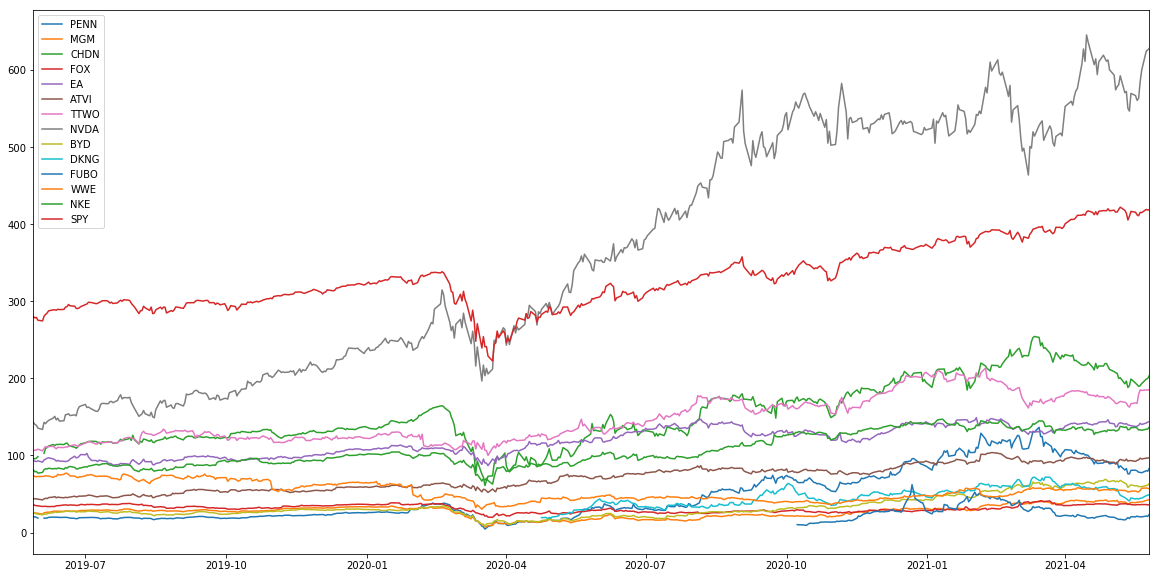

In [35]:
sp500_all_stocks_prices.plot(figsize=(20,10))

In [36]:
correlation = sp500_all_stocks_prices.corr()
correlation

PENN       MGM      CHDN       FOX        EA      ATVI      TTWO  \
PENN  1.000000  0.543710  0.959721  0.146212  0.791386  0.883506  0.895988   
MGM   0.543710  1.000000  0.654424  0.837384  0.155721  0.250252  0.321871   
CHDN  0.959721  0.654424  1.000000  0.271698  0.759159  0.836329  0.855603   
FOX   0.146212  0.837384  0.271698  1.000000 -0.218295 -0.160591 -0.134297   
EA    0.791386  0.155721  0.759159 -0.218295  1.000000  0.961330  0.891450   
ATVI  0.883506  0.250252  0.836329 -0.160591  0.961330  1.000000  0.914746   
TTWO  0.895988  0.321871  0.855603 -0.134297  0.891450  0.914746  1.000000   
NVDA  0.873190  0.227594  0.834863 -0.191298  0.926795  0.959860  0.910218   
BYD   0.879268  0.824506  0.905354  0.504939  0.589970  0.701469  0.696855   
DKNG  0.924541  0.812149  0.895945  0.730277  0.420396  0.752470  0.662465   
FUBO  0.688439  0.221313  0.467794  0.020486  0.499330  0.507941  0.754095   
WWE  -0.256342  0.495317 -0.165469  0.704660 -0.531257 -0.527727 -0.359056   
NKE   0.946063  0.511094  0.940191  0.088157  0.808874  0.877098  0.908147   
SPY   0.909851  0.692748  0.952126  0.320339  0.788387  0.843394  0.834871   

          NVDA       BYD      DKNG      FUBO       WWE       NKE       SPY  
PENN  0.873190  0.879268  0.924541  0.688439 -0.256342  0.946063  0.909851  
MGM   0.227594  0.824506  0.812149  0.221313  0.495317  0.511094  0.692748  
CHDN  0.834863  0.905354  0.895945  0.467794 -0.165469  0.940191  0.952126  
FOX  -0.191298  0.504939  0.730277  0.020486  0.704660  0.088157  0.320339  
EA    0.926795  0.589970  0.420396  0.499330 -0.531257  0.808874  0.788387  
ATVI  0.959860  0.701469  0.752470  0.507941 -0.527727  0.877098  0.843394  
TTWO  0.910218  0.696855  0.662465  0.754095 -0.359056  0.908147  0.834871  
NVDA  1.000000  0.684055  0.732120 -0.141132 -0.571346  0.906209  0.843700  
BYD   0.684055  1.000000  0.822181  0.163061  0.056521  0.828214  0.933005  
DKNG  0.732120  0.822181  1.000000  0.506256  0.543236  0.835867  0.783660  
FUBO -0.141132  0.163061  0.506256  1.000000  0.300240  0.719062  0.140149  
WWE  -0.571346  0.056521  0.543236  0.300240  1.000000 -0.321212 -0.139996  
NKE   0.906209  0.828214  0.835867  0.719062 -0.321212  1.000000  0.924010  
SPY   0.843700  0.933005  0.783660  0.140149 -0.139996  0.924010  1.000000

In [37]:
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

### We created a heatmap graph to show the correlation between all of our stocks and the S&P 500.

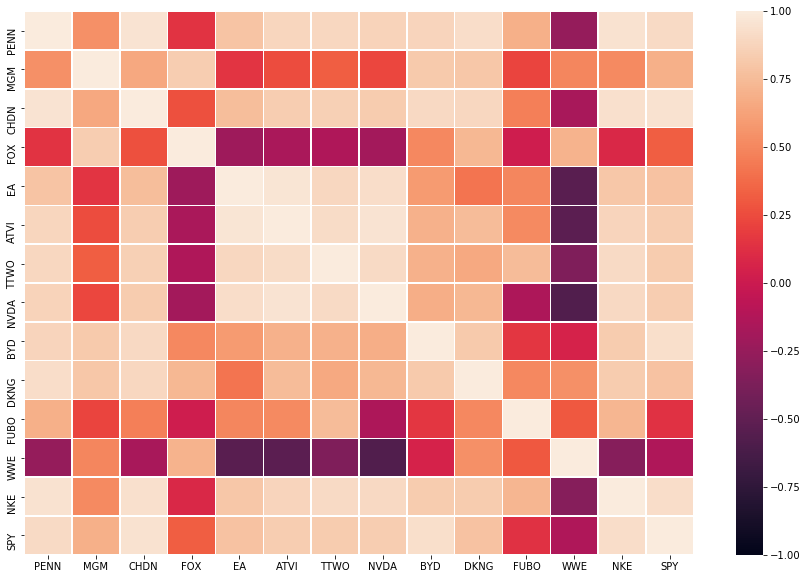

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, ax=ax, linewidth=.5)

In [94]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD", "SPY"]


timeframe = "1D"


start_date = pd.Timestamp("2020-03-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-30", tz="America/New_York").isoformat()


dip_rebound = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

dip_rebound.head()

ATVI                                    BYD  \
                            open    high     low  close   volume   open   
time                                                                      
2020-03-02 00:00:00-05:00  58.30  60.650  57.910  60.62  8461386  26.91   
2020-03-03 00:00:00-05:00  60.56  61.820  58.140  58.75  8843838  26.31   
2020-03-04 00:00:00-05:00  60.00  62.590  59.590  62.57  6198394  25.48   
2020-03-05 00:00:00-05:00  60.78  62.300  60.340  61.52  6102055  23.91   
2020-03-06 00:00:00-05:00  59.65  60.875  58.355  59.96  8486587  21.37   

                                                             ...    TTWO  \
                              high      low  close   volume  ...    open   
time                                                         ...           
2020-03-02 00:00:00-05:00  26.9100  25.2200  26.21  1674514  ...  108.58   
2020-03-03 00:00:00-05:00  26.8775  24.5200  24.75  1822125  ...  111.75   
2020-03-04 00:00:00-05:00  25.4800  23.9649  24.73  1721482  ...  113.44   
2020-03-05 00:00:00-05:00  23.9100  22.2538  22.45  2267447  ...  115.95   
2020-03-06 00:00:00-05:00  23.6000  21.0000  22.33  2331098  ...  113.70   

                                                              WWE         \
                             high     low   close   volume   open   high   
time                                                                       
2020-03-02 00:00:00-05:00  112.13  107.92  112.02  2014977  47.00  47.10   
2020-03-03 00:00:00-05:00  115.04  109.81  111.14  1710061  46.58  47.82   
2020-03-04 00:00:00-05:00  119.79  113.44  119.51  2187111  45.69  46.00   
2020-03-05 00:00:00-05:00  119.08  115.10  117.31  2052161  44.12  45.44   
2020-03-06 00:00:00-05:00  118.71  113.47  117.71  4532950  43.23  44.51   

                                                    
                               low  close   volume  
time                                                
2020-03-02 00:00:00-05:00  45.1050  46.35  1811367  
2020-03-03 00:00:00-05:00  44.4800  45.16  1524004  
2020-03-04 00:00:00-05:00  44.4300  44.97  1586525  
2020-03-05 00:00:00-05:00  43.7738  44.92  1211700  
2020-03-06 00:00:00-05:00  42.4400  42.79  1555232  

[5 rows x 65 columns]

In [95]:
dip_rebound_prices = pd.DataFrame()
dip_rebound_prices['PENN'] = dip_rebound['PENN']['close']
dip_rebound_prices['MGM'] = dip_rebound['MGM']['close']
dip_rebound_prices['CHDN'] = dip_rebound['CHDN']['close']
dip_rebound_prices['FOX'] = dip_rebound['FOX']['close']
dip_rebound_prices['EA'] = dip_rebound['EA']['close']
dip_rebound_prices['ATVI'] = dip_rebound['ATVI']['close']
dip_rebound_prices['TTWO'] = dip_rebound['TTWO']['close']
dip_rebound_prices['NVDA'] = dip_rebound['NVDA']['close']
dip_rebound_prices['BYD'] = dip_rebound['BYD']['close']
dip_rebound_prices['DKNG'] = dip_rebound['DKNG']['close']
#dip_rebound_prices['FUBO'] = dip_rebound['FUBO']['close']
dip_rebound_prices['WWE'] = dip_rebound['WWE']['close']
dip_rebound_prices['NKE'] = dip_rebound['NKE']['close']
dip_rebound_prices['SPY'] = dip_rebound['SPY']['close']


dip_rebound_prices.index = dip_rebound_prices.index.date
dip_rebound_prices.tail(10)

PENN    MGM    CHDN     FOX      EA   ATVI    TTWO      NVDA  \
2020-06-17  32.4500  18.96  136.87  27.760  128.11  75.55  138.87  369.4700   
2020-06-18  31.7300  18.58  136.12  28.660  129.38  76.01  141.30  369.0000   
2020-06-19  32.1300  18.19  133.50  27.840  130.17  76.58  142.61  370.3800   
2020-06-22  31.4200  17.77  135.69  27.620  129.73  76.13  141.17  381.0000   
2020-06-23  36.8100  18.45  141.70  27.800  130.58  76.42  143.33  378.0400   
2020-06-24  33.3800  16.93  132.73  27.010  130.93  75.58  139.87  369.4200   
2020-06-25  31.6952  16.70  133.95  26.750  130.75  76.22  140.37  379.8000   
2020-06-26  30.6500  15.70  125.81  25.740  130.93  76.44  141.29  366.4400   
2020-06-29  29.7800  16.82  132.75  26.795  130.75  75.46  137.79  368.1200   
2020-06-30  30.5400  16.81  133.07  26.820  132.05  75.87  139.51  379.4455   

               BYD     DKNG    WWE       NKE     SPY  
2020-06-17  22.165  40.6800  44.84   99.2100  311.56  
2020-06-18  21.690  40.8500  45.28   98.4500  311.74  
2020-06-19  21.110  42.0000  45.18   95.9294  308.56  
2020-06-22  21.300  38.3117  44.84   99.4800  310.68  
2020-06-23  22.430  37.9800  44.78  101.9600  312.03  
2020-06-24  21.210  37.5797  43.85  100.0500  304.12  
2020-06-25  20.280  36.0600  43.02  101.3100  307.31  
2020-06-26  19.610  33.3900  41.36   93.6700  300.01  
2020-06-29  20.555  33.5300  43.61   95.9100  304.43  
2020-06-30  20.880  33.2600  43.43   98.0200  308.57

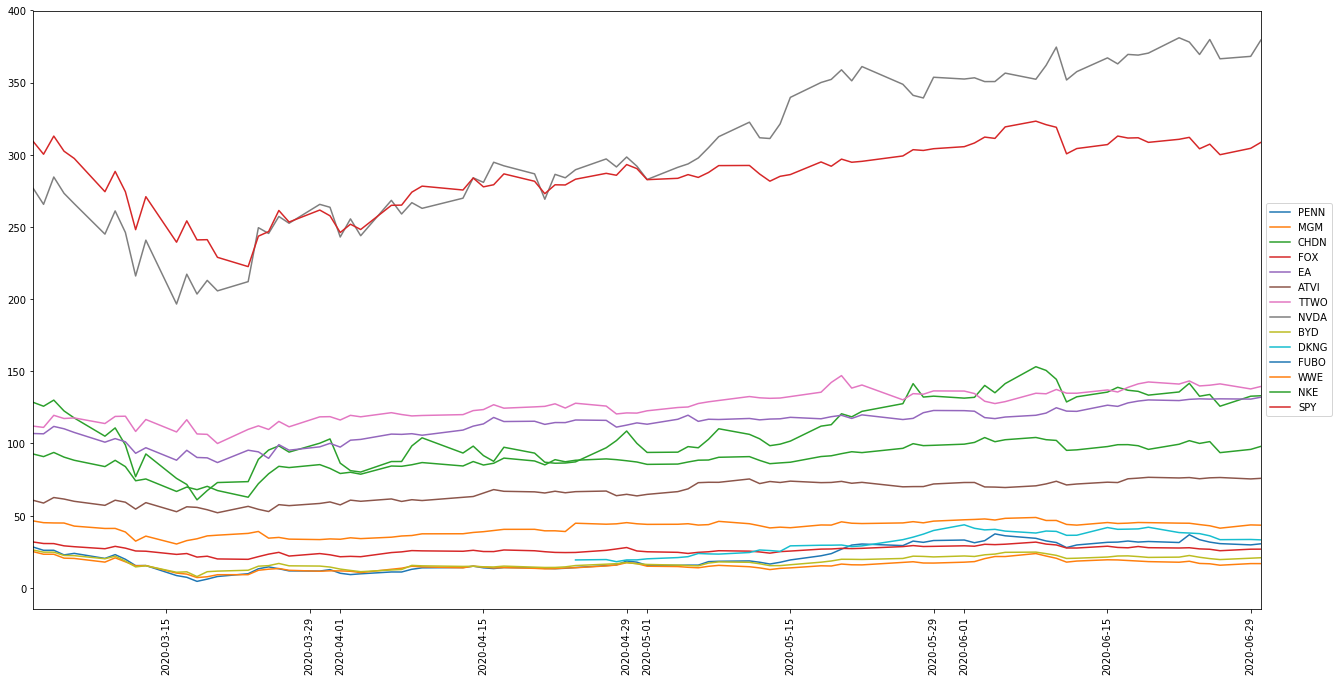

In [42]:
dip_rebound_prices.plot(figsize=(22,11), rot=90).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

### We then wanted to zoom in on when COVID hit the United States to see the dip and rebound of the portfolio stocks and the S&P 500 more closely.

In [43]:
ticker = ["NVDA", "SPY"]


timeframe = "1D"


start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()


crypto_sp500 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

crypto_sp500.head()

NVDA                                         SPY  \
                             open      high     low   close    volume    open   
time                                                                            
2019-05-28 00:00:00-04:00  145.86  147.1800  143.25  143.30   9185563  283.09   
2019-05-29 00:00:00-04:00  141.41  142.8200  138.94  140.31  13056864  278.91   
2019-05-30 00:00:00-04:00  140.31  141.7499  137.57  139.11   9231333  279.11   
2019-05-31 00:00:00-04:00  137.14  139.8548  135.39  135.46   8923463  276.21   
2019-06-03 00:00:00-04:00  135.91  137.4700  132.60  133.78  10726924  275.31   

                                                                
                               high      low   close    volume  
time                                                            
2019-05-28 00:00:00-04:00  284.1500  280.180  280.31  57121638  
2019-05-29 00:00:00-04:00  279.3600  276.710  278.38  88121995  
2019-05-30 00:00:00-04:00  280.0400  277.805  279.05  52483275  
2019-05-31 00:00:00-04:00  277.1200  275.240  275.37  67316713  
2019-06-03 00:00:00-04:00  276.5521  273.090  274.54  82473795

In [44]:
cryptp_sp500_prices = pd.DataFrame()
cryptp_sp500_prices['NVDA'] = crypto_sp500['NVDA']['close']
cryptp_sp500_prices['SPY'] = crypto_sp500['SPY']['close']
cryptp_sp500_prices.index = cryptp_sp500_prices.index.date
cryptp_sp500_prices.head(10)

NVDA       SPY
2019-05-28  143.30  280.3100
2019-05-29  140.31  278.3800
2019-05-30  139.11  279.0500
2019-05-31  135.46  275.3700
2019-06-03  133.78  274.5400
2019-06-04  143.02  280.5200
2019-06-05  141.33  282.9000
2019-06-06  143.79  284.7400
2019-06-07  145.50  287.6300
2019-06-10  148.45  288.9305

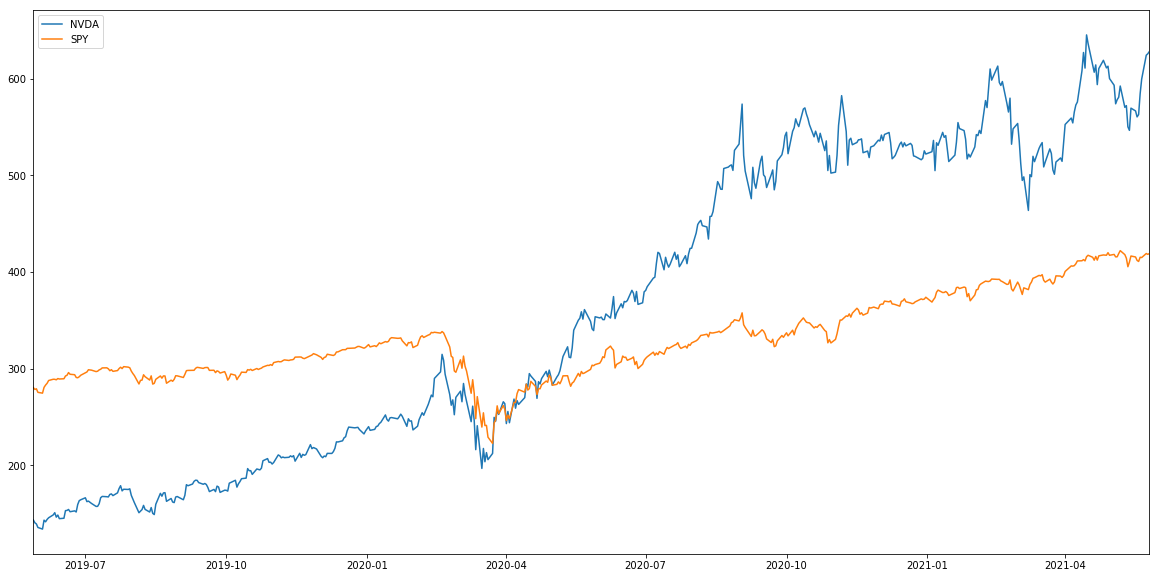

In [45]:
cryptp_sp500_prices.plot(figsize=(20,10))

In [46]:
from pathlib import Path

In [47]:
btc_path = Path("BTC-USD.csv")
eth_path = Path("ETH-USD.csv")

In [48]:
btc_df = pd.read_csv(btc_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
eth_df = pd.read_csv(eth_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [49]:
#cumulative product 

In [50]:
combined_df = pd.concat([btc_df, eth_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-05-25  7991.885254  8117.925781  7965.976074  8052.543945  8052.543945   
2019-05-26  8055.206055  8687.520508  7924.670410  8673.215820  8673.215820   
2019-05-27  8674.072266  8907.174805  8668.705078  8805.778320  8805.778320   
2019-05-28  8802.757813  8807.016602  8634.721680  8719.961914  8719.961914   
2019-05-29  8718.591797  8755.852539  8482.728516  8659.487305  8659.487305   

                  Volume        Open        High         Low       Close  \
Date                                                                       
2019-05-25  2.225681e+10  249.694046  257.356842  249.088791  251.759872   
2019-05-26  2.667797e+10  251.724792  269.166534  247.245392  267.069641   
2019-05-27  2.794984e+10  267.141876  278.507263  265.444702  272.862640   
2019-05-28  2.422692e+10  272.590485  274.320831  267.514374  271.768707   
2019-05-29  2.347348e+10  271.779053  273.756287  263.091400  269.455688   

             Adj Close        Volume  
Date                                  
2019-05-25  251.759872  8.924985e+09  
2019-05-26  267.069641  9.664268e+09  
2019-05-27  272.862640  1.207466e+10  
2019-05-28  271.768707  1.036285e+10  
2019-05-29  269.455688  9.819132e+09

## We noticed from analysis above that NVDA (Nvidia) was a huge outlier so we wanted to look closer into its realtionship with the S&P 500 and two major crypto-currencies. We chose this analysis because Nvidia makes graphics cards that play a major role in crypto currency mining. 

In [51]:
combined_df.drop(columns=['Volume', 'Open', 'High', 'Low', 'Adj Close'], inplace=True)

combined_df.head()

Close       Close
Date                               
2019-05-25  8052.543945  251.759872
2019-05-26  8673.215820  267.069641
2019-05-27  8805.778320  272.862640
2019-05-28  8719.961914  271.768707
2019-05-29  8659.487305  269.455688

In [52]:
combined_df.columns= ["BTC", "ETH"]
combined_df.head()

BTC         ETH
Date                               
2019-05-25  8052.543945  251.759872
2019-05-26  8673.215820  267.069641
2019-05-27  8805.778320  272.862640
2019-05-28  8719.961914  271.768707
2019-05-29  8659.487305  269.455688

In [53]:
crypto_stocks_compare = pd.concat([combined_df, cryptp_sp500_prices], axis='columns', join="inner")

In [54]:
crypto_stocks_compare.head()

BTC         ETH    NVDA     SPY
2019-05-28  8719.961914  271.768707  143.30  280.31
2019-05-29  8659.487305  269.455688  140.31  278.38
2019-05-30  8319.472656  255.858948  139.11  279.05
2019-05-31  8574.501953  268.113556  135.46  275.37
2019-06-03  8208.995117  252.607925  133.78  274.54

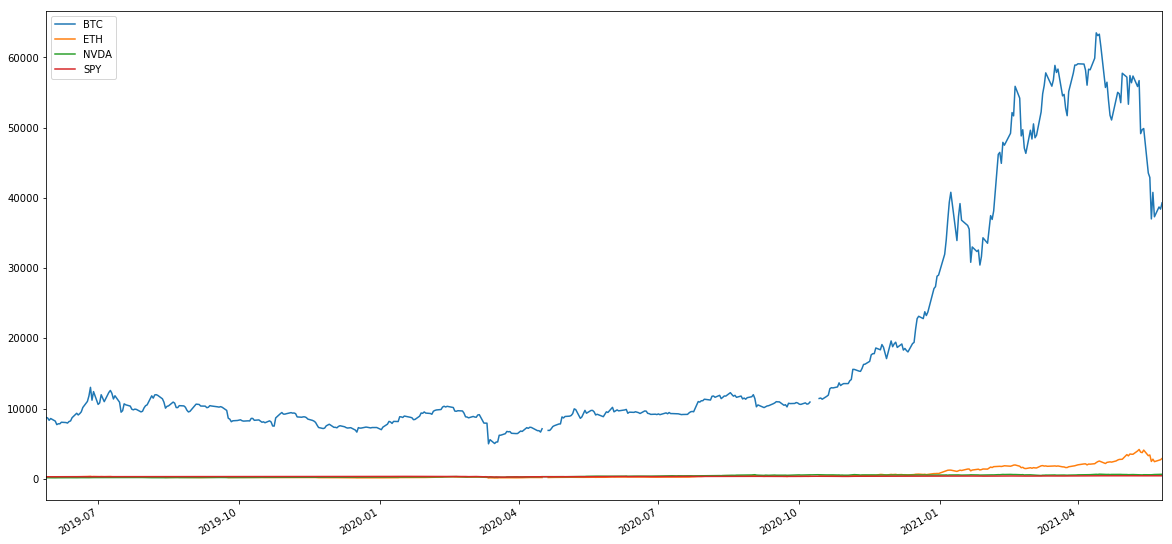

In [55]:
crypto_stocks_compare.plot(figsize=(20,10))

In [56]:
plot_crypto = crypto_stocks_compare.cumprod(axis=1)

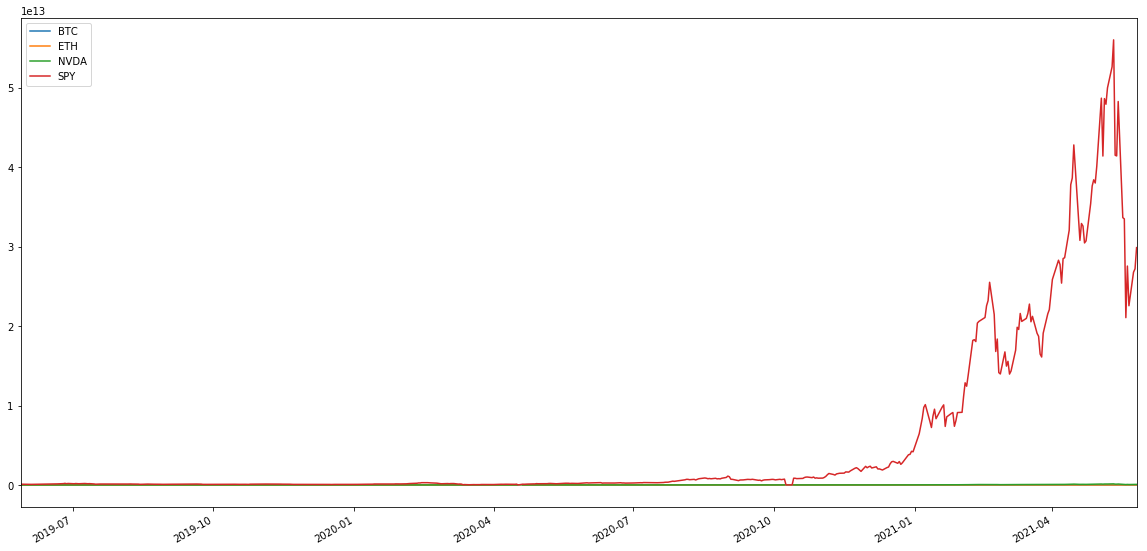

In [57]:
plot_crypto.plot(figsize=(20,10))

In [58]:
test = crypto_stocks_compare.pct_change()

## After realizing the scales between Bitcoin and the other stocks were too different to graph in a pretty way we chose to look at the percent change to show the correlation between NVDA and the Cryptos with S&P500 as a psuedo baseline.

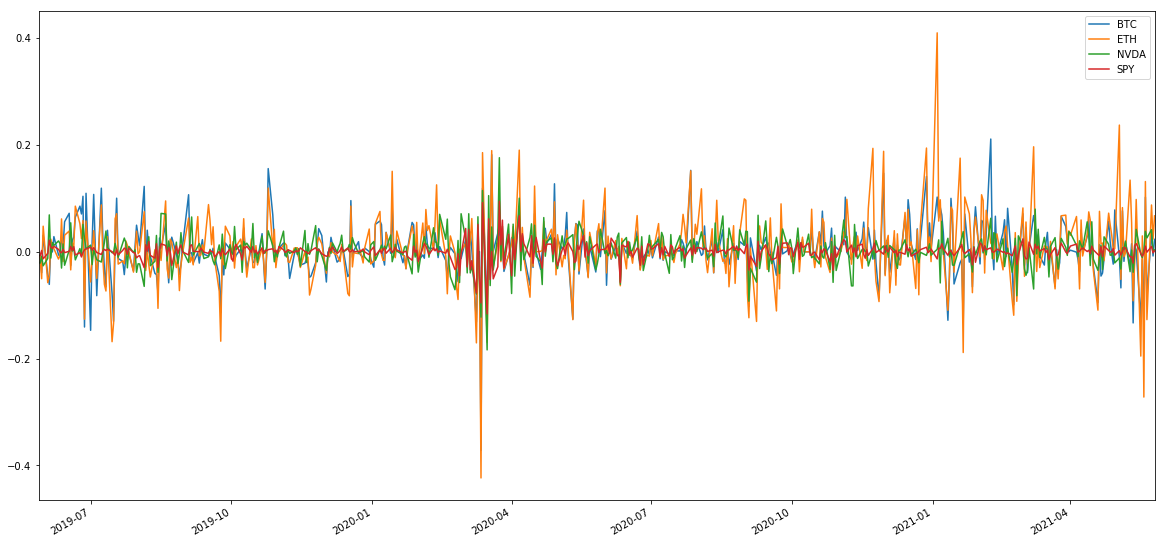

In [59]:
test.plot(figsize=(20,10))

In [60]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD", "SPY"]


timeframe = "1D"


start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()


performance = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

performance.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 60 columns]

In [61]:
performance_price = pd.DataFrame()
performance_price['PENN'] = performance['PENN']['close']
performance_price['MGM'] = performance['MGM']['close']
performance_price['CHDN'] = performance['CHDN']['close']
performance_price['FOX'] = performance['FOX']['close']
performance_price['EA'] = performance['EA']['close']
performance_price['ATVI'] = performance['ATVI']['close']
performance_price['TTWO'] = performance['TTWO']['close']
performance_price['NVDA'] = performance['NVDA']['close']
performance_price['BYD'] = performance['BYD']['close']
performance_price['WWE'] = performance['WWE']['close']
performance_price['NKE'] = performance['NKE']['close']
performance_price['SPY'] = performance['SPY']['close']


performance_price.index = performance_price.index.date
performance_price.head(10)

PENN    MGM    CHDN    FOX     EA    ATVI    TTWO    NVDA  \
2019-05-28  20.590  25.33   95.97  36.17  93.50  43.500  106.51  143.30   
2019-05-29  20.320  25.35   95.81  35.29  92.55  43.990  106.99  140.31   
2019-05-30  19.740  25.34   96.36  34.82  92.14  43.560  106.98  139.11   
2019-05-31  18.835  24.83   98.58  34.71  93.07  43.360  108.15  135.46   
2019-06-03     NaN  23.86     NaN  33.78  91.30  42.370  105.95  133.78   
2019-06-04  18.790  25.65  102.78  34.08  94.13  43.620  109.00  143.02   
2019-06-05  18.670  25.96  109.13  34.02  95.26  44.530  111.55  141.33   
2019-06-06  18.870  26.50  110.28  33.74  96.39  44.110  110.71  143.79   
2019-06-07  19.720  26.27  112.27  33.68  96.98  45.385  111.61  145.50   
2019-06-10  20.070  27.42  114.18  33.75  95.52  46.000  111.78  148.45   

               BYD    WWE    NKE       SPY  
2019-05-28  25.490  74.07  81.18  280.3100  
2019-05-29  25.080  72.50  78.85  278.3800  
2019-05-30  24.250  72.51  79.24  279.0500  
2019-05-31  23.925  72.73  77.14  275.3700  
2019-06-03  22.960  72.74  78.01  274.5400  
2019-06-04  24.040  73.12  81.62  280.5200  
2019-06-05  23.830  73.69  82.74  282.9000  
2019-06-06  24.180  73.50  82.47  284.7400  
2019-06-07  25.070  73.28  83.41  287.6300  
2019-06-10  25.650  71.51  82.57  288.9305

In [62]:
performance_price_2 = performance_price.pct_change().dropna()

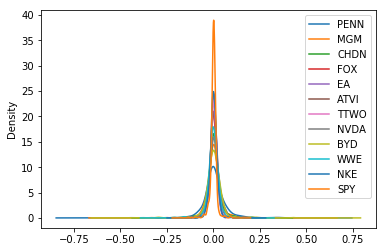

In [63]:
performance_price_2.plot.density()

In [64]:
performance_price_2.sum()

PENN    2.413906
MGM     1.040595
CHDN    1.112258
FOX     0.169864
EA      0.530319
ATVI    0.924023
TTWO    0.685847
NVDA    1.729679
BYD     1.433008
WWE    -0.036715
NKE     0.634478
SPY     0.470022
dtype: float64

In [65]:
#initial imports
import numpy as np
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [75]:
prices_through_covid = px.line(all_stocks_prices_two,
                              title="Stock Prices through Covid",
                              )

In [81]:
stocks_against_sp500 = px.line(sp500_all_stocks_prices,
                              title="Sports Stocks vs the Market",
                              )

In [96]:
dip_through_covid = px.line(dip_rebound_prices,
                           title="Tracking Recovery from Start of Covid",
                           )

In [100]:
def sports_heatmap():
    fig, ax = plt.subplots(figsize=(15,10))
    plot = sns.heatmap(correlation, vmin=-1, vmax=1, ax=ax, linewidth=.5)
    return plot.figure

In [97]:
dip_rebound_prices.head()

PENN    MGM    CHDN    FOX      EA   ATVI    TTWO    NVDA  \
2020-03-02  28.230  25.06  128.47  31.77  106.91  60.62  112.02  276.57   
2020-03-03  26.030  23.30  125.81  30.73  106.70  58.75  111.14  265.64   
2020-03-04  26.050  23.29  130.05  30.67  111.83  62.57  119.51  284.56   
2020-03-05  22.840  20.59  122.56  29.12  110.20  61.52  117.31  273.29   
2020-03-06  23.905  20.39  117.68  28.52  107.65  59.96  117.71  266.07   

              BYD  DKNG    WWE    NKE     SPY  
2020-03-02  26.21   NaN  46.35  92.69  309.08  
2020-03-03  24.75   NaN  45.16  90.92  300.34  
2020-03-04  24.73   NaN  44.97  93.79  312.91  
2020-03-05  22.45   NaN  44.92  90.57  302.45  
2020-03-06  22.33   NaN  42.79  88.38  297.42

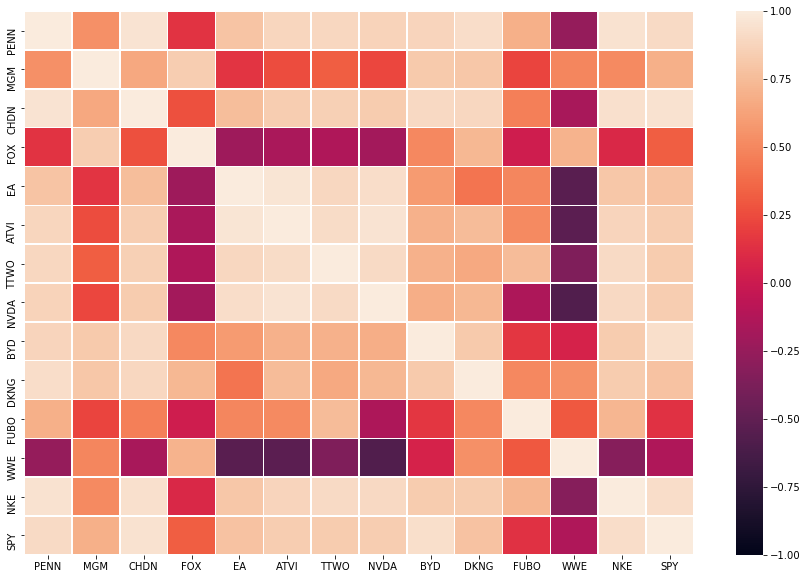

In [106]:
row = pn.Row(prices_through_covid, dip_through_covid)

row2 = pn.Row(stocks_against_sp500, sports_heatmap())

Tabs
    [0] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [1] Row
        [0] Plotly(Figure)
        [1] Matplotlib(Figure)
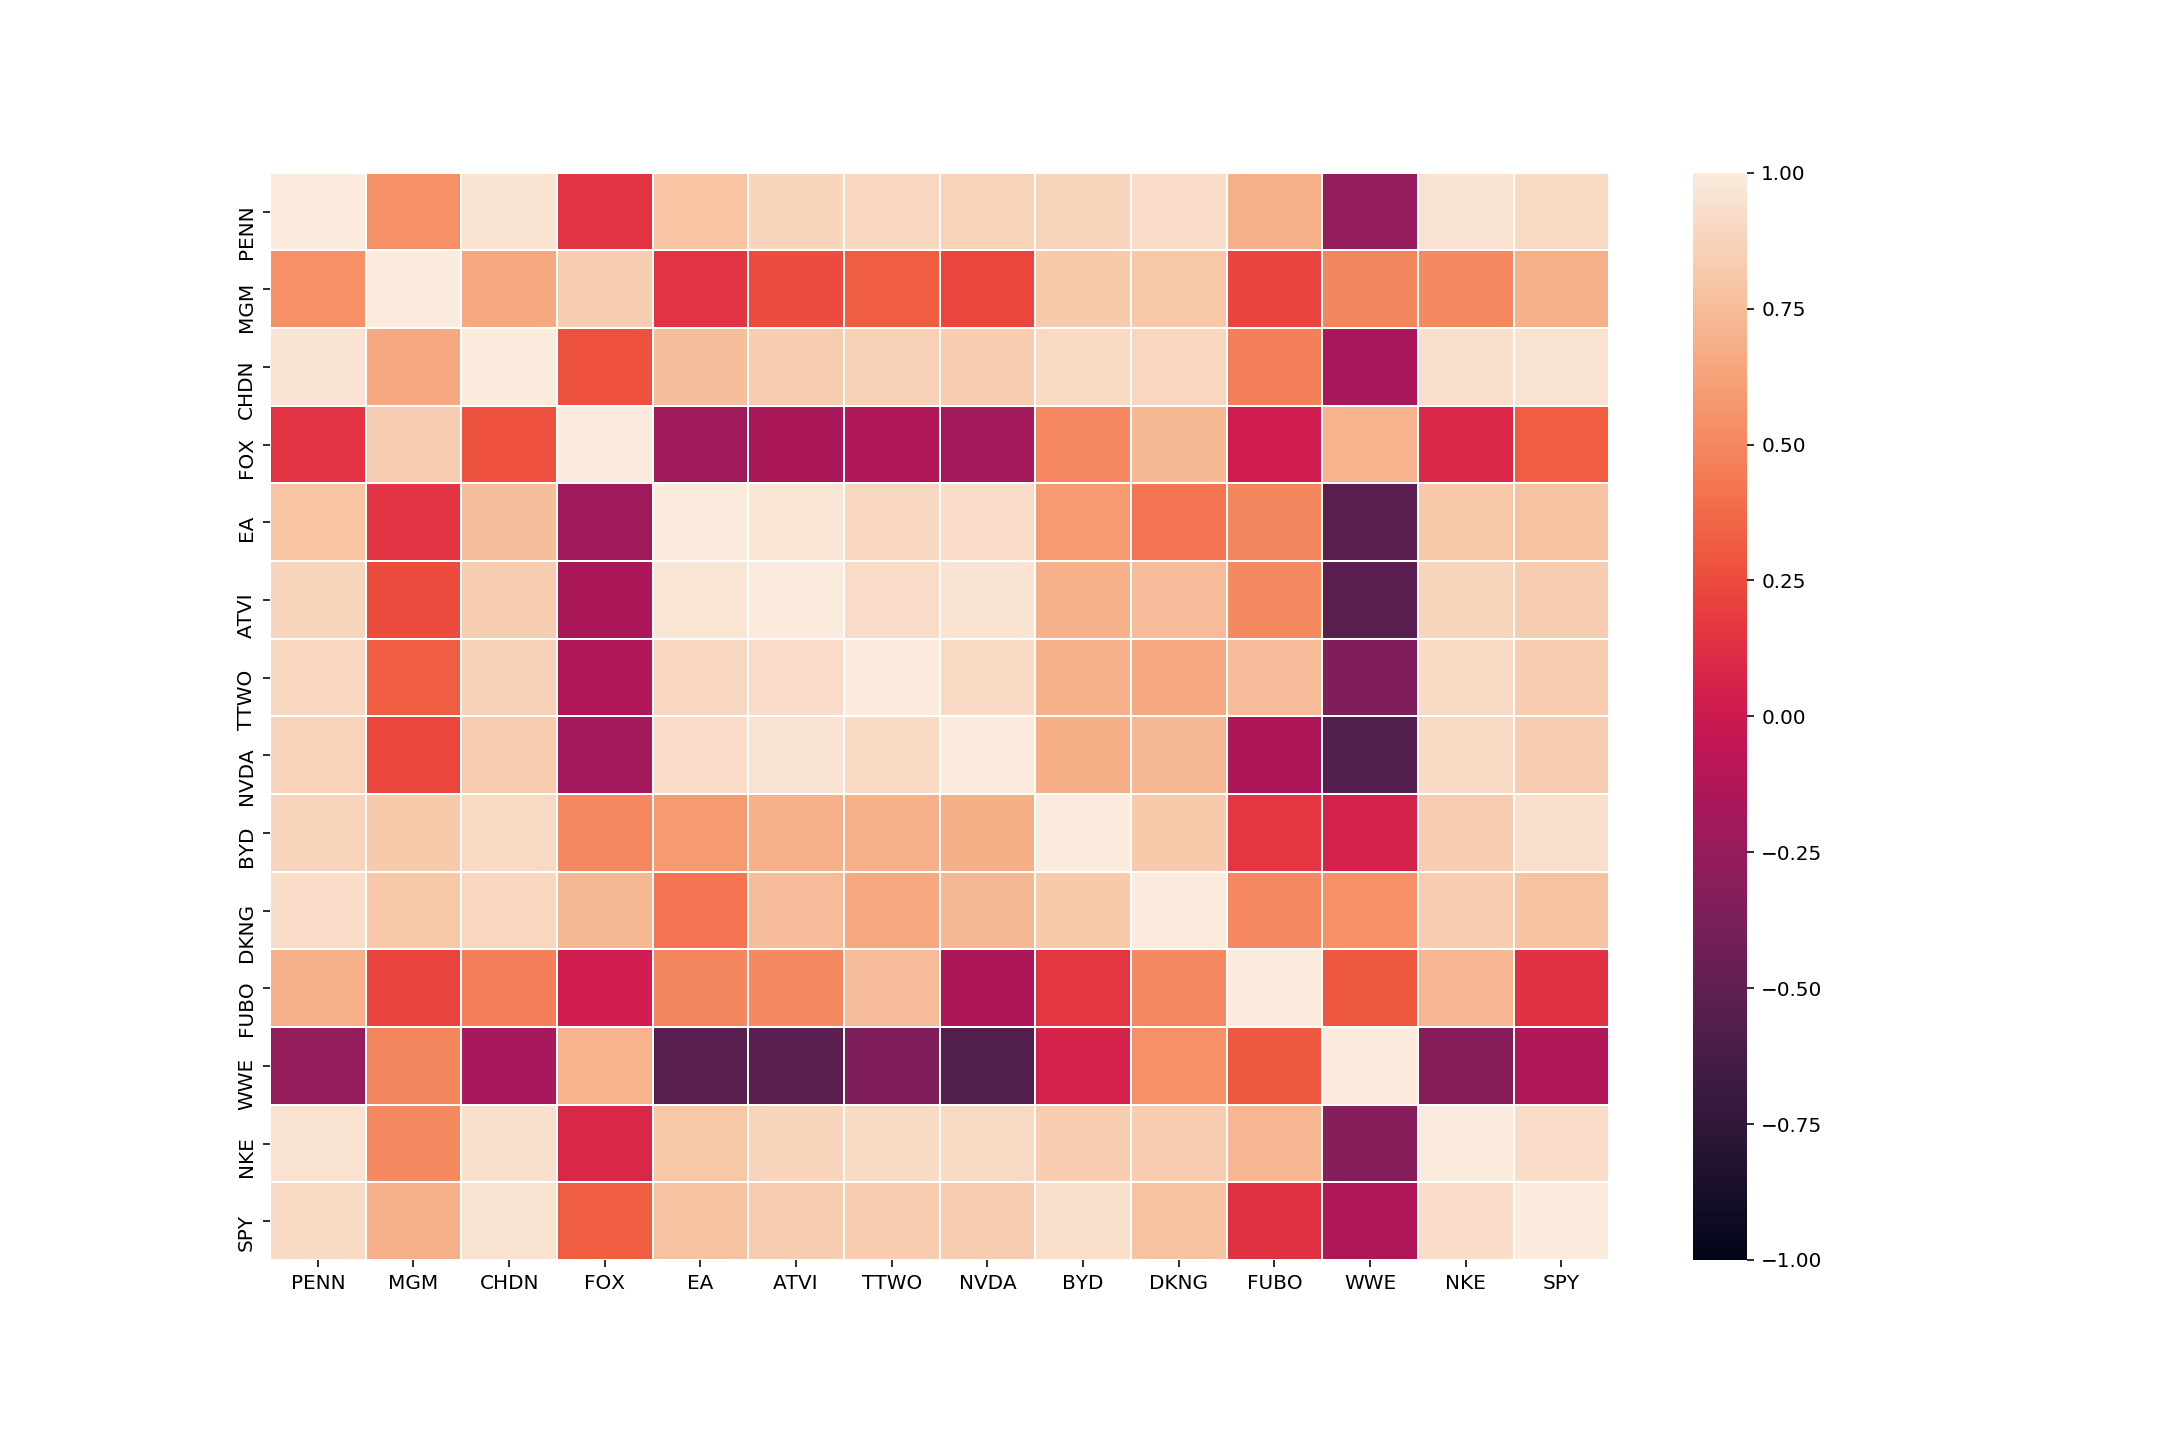

In [110]:
tabs = pn.Tabs(
    ("Stocks through Covid", row),
    ("Sports Related Portfolio vs S&P 500", row2))

tabs